In [1]:
import numpy as np

In [2]:
A = np.array([
    [3,7],
    [-4,-6],
    [7,8],
    [1,-1],
    [-4,-1],
    [-3,-7]
])

In [3]:
m,n  = A.shape

In [4]:
print("Mean Across rows")
print(np.mean(A,axis=0))

Mean Across rows
[0. 0.]


In [5]:
import pandas as pd
df = pd.DataFrame(A,columns=['a0','a1'])
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

(-6.0, 8.0, -8.0, 10.0)

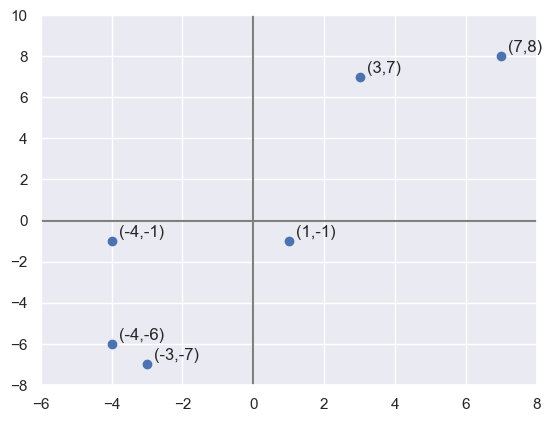

In [13]:
# plots
plt.scatter(A[:,0],A[:,1])   # create a scatter plot 

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
# plt.axes().set_aspect('equal')

# # labels
# plt.xlabel("$a_0$")
# plt.ylabel("$a_1$")
# plt.title("Dataset $A$")

In [14]:
a0 = A[:,0]
a1 = A[:,1]

In [15]:
prod = a0*a1

In [18]:
print(np.sum(prod)/(m-1))

25.0


In [21]:
np.cov(a0,a1)
## This will covariance of 4 i.e ((a0,a0),(a0,a1),(a1,a0),(a1,a1))

array([[20., 25.],
       [25., 40.]])

##### The linear algebra way

covariance = (A(Transpose)A / (m-1))

In [22]:
A.T

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [26]:
dot_prod = A.T @ A
dot_prod

array([[100, 125],
       [125, 200]])

In [29]:
sigma = dot_prod/(m-1)

In [30]:
sigma

array([[20., 25.],
       [25., 40.]])

#### Eigen vector and Eigen value

In [31]:
l,x = np.linalg.eig(sigma)

In [32]:
print("eigen values")
print(l)

eigen values
[ 3.07417596 56.92582404]


In [33]:
print("eigen vectors")
print(x)

eigen vectors
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [36]:
# let's check the first Eigenvalue, Eigenvector combination
print("Sigma times eigenvector:")
print(sigma @ x[:,0]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[0] * x[:,0]) # scalar times 2x1

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [38]:
# ... and the product with the second eigenvalue
print("Sigma times eigenvector:")
print(sigma @ x[:,1]) # 2x2 times 2x1
print("Eigenvalue times eigenvector:")
print(l[1] * x[:,1]) # scalar times 2x1, ANNOYING - MUST USE * vs. @

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [41]:
print("The first principal component is eigenvector with largest evalue:")
print(x[:,1])
print("---")
print("Second principal component:")
print(x[:,0])

The first principal component is eigenvector with largest evalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [42]:
x[:,1].T @ x[:,0]

1.2104645553323103e-18

Text(0.5, 1.0, 'Eigenvectors of $\\Sigma$')

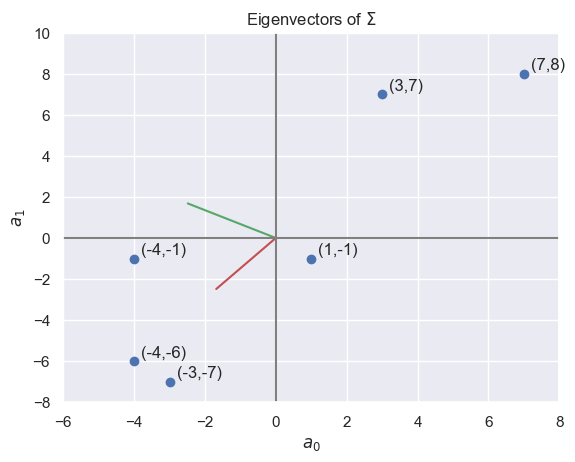

In [45]:
plt.scatter(A[:,0],A[:,1])
scale = 3 # increase this scaling factor to highlight these vectors
plt.plot([0,x[0,1]*scale],[0,x[1,1]*scale],'r') # First principal component
plt.plot([0,x[0,0]*scale],[0,x[1,0]*scale],'g') # Second principal component

# annotations
for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

#### Dimensionality reduction 2D - 1D

In [46]:
Amat = np.asmatrix(A)

In [47]:
Xmat = np.asmatrix(x)

In [48]:
pc1 = Xmat[:,1]

In [49]:
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [51]:
Acomp = Amat @ pc1
print(Acomp)

[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [55]:
Arec = Acomp @ pc1.T
Arec

matrix([[ 4.1925824 ,  6.1925824 ],
        [-4.04264872, -5.97112541],
        [ 5.9140394 ,  8.73523112],
        [-0.14993368, -0.22145699],
        [-1.72145699, -2.54264872],
        [-4.1925824 , -6.1925824 ]])

Text(0.5, 1.0, 'Reconstructing the 1D compression of $A$')

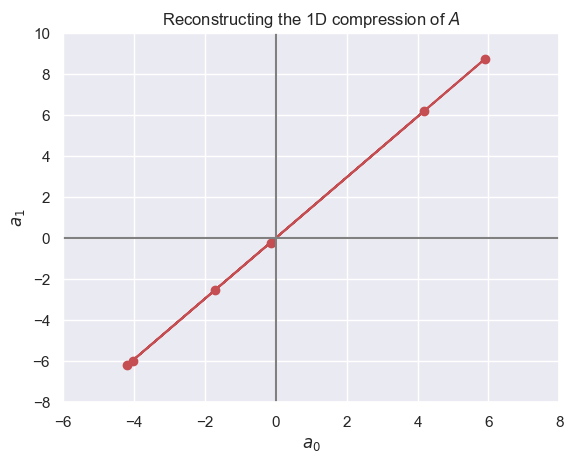

In [56]:
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') # Arec in RED

# axes
plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])

# labels
plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Reconstructing the 1D compression of $A$")

In [58]:
print(np.linalg.matrix_rank(Amat))

2


In [59]:
print(np.linalg.matrix_rank(Arec))

1
